# Image Classification
Fashion MNIST

## Importing Module

In [1]:
import tensorflow as tf

from matplotlib import pyplot as plt

print(f'Tensorflow Version : {tf.__version__}')

Tensorflow Version : 2.8.2


## Problem

- Build a classifier for the Fashion MNIST dataset.
The test will expect it to classify `10` classes.
- The input shape should be `28x28` monochrome. Do not resize the data.
- Your input layer should accept `(28, 28)` as the input shape.
- Don't use lambda layers in your model.
- Desired accuracy AND validation_accuracy > `83%`

### Preparing data
Download from [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### Explore data

In [3]:
print(f'Total Train Image : {len(train_images)}')
print(f'Total Test Image : {len(test_images)}')

Total Train Image : 60000
Total Test Image : 10000


#### Visualize Image

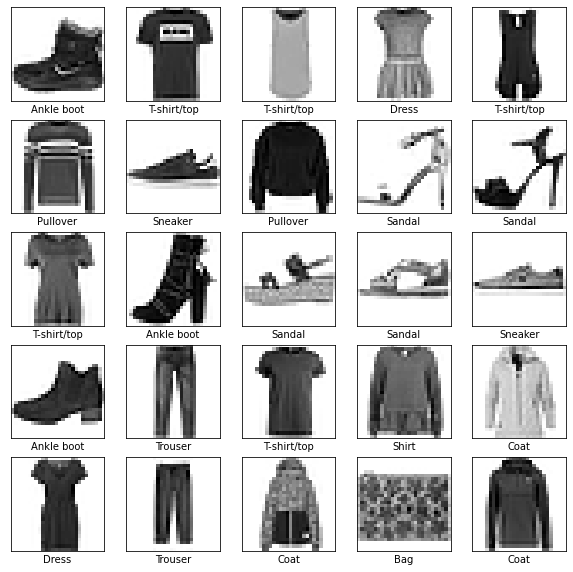

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Preparing Model

In [5]:
IMG_SIZE = (28,28)
BATCH_SIZE = 32

#### Preprocessing data

In [6]:
train_images = train_images / 255.
test_images = test_images / 255.

#### Build Model

In [7]:
def build_model():
  """
  Create a model sequential with convolutional layers

  Returns:
      model (tf.keras Model): the Image classifier model
  """

  # Define Params
  lr = 1e-3
  adam = tf.keras.optimizers.Adam(learning_rate=lr) # Optimizer
  losses = tf.keras.losses.SparseCategoricalCrossentropy()

  # Define Activation Function
  relu = tf.nn.relu
  softmax = tf.nn.softmax

  # Define model sequential
  model = tf.keras.Sequential()

  # Define convolutional layers
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation=relu, input_shape=IMG_SIZE + (1,)))
  model.add(tf.keras.layers.MaxPooling2D(2, 2))
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation=relu))
  model.add(tf.keras.layers.MaxPooling2D(2, 2))

  # Define fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation=relu))
  model.add(tf.keras.layers.Dense(10, activation=softmax)) # Output

  # Compile model
  model.compile(optimizer=adam, loss=losses, metrics=['accuracy'])

  # Check Summary Model
  model.summary()

  print('\nModel Successfully Create')
  
  return model

#### Define Callbacks

In [8]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5", 
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=2, 
                                                  mode ="max", 
                                                  verbose=2, 
                                                  restore_best_weights=True)

### Train Model

In [9]:
model = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
history = model.fit(train_images,
                    train_labels, 
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[model_checkpoint, early_stopping],
                    steps_per_epoch=len(train_images)//BATCH_SIZE)

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.4424 - accuracy: 0.8412
Epoch 1: val_accuracy improved from -inf to 0.87270, saving model to model.h5
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4420 - accuracy: 0.8413 - val_loss: 0.3448 - val_accuracy: 0.8727
Epoch 2/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.8922
Epoch 2: val_accuracy improved from 0.87270 to 0.89160, saving model to model.h5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.8922 - val_loss: 0.2963 - val_accuracy: 0.8916
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2482 - accuracy: 0.9083
Epoch 3: val_accuracy did not improve from 0.89160
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9082 - val_loss: 0.3073 - val_accuracy: 0.8897
Epoch 4/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.919

### Visualization result

In [11]:
def visualize_result(history):
  '''Function for Visual result'''
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper left')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

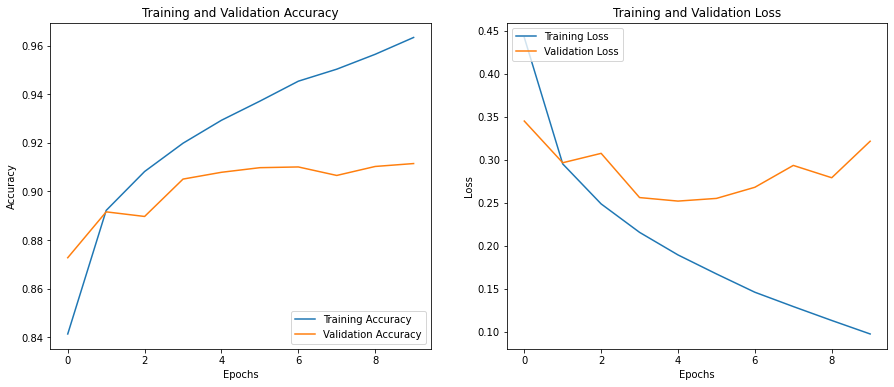

In [12]:
visualize_result(history)

### Download Model

In [ ]:
from google.colab import files
files.download(model.h5)